# Phân tích mức tiêu hao nhiên liệu

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


Đọc dữ liệu

In [2]:
mpg_data = pd.read_csv('mpg.csv')

In [3]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [4]:
# Kiểm tra các dòng có dữ liệu bị thiếu
missing_data = mpg_data.isnull().sum()

# In ra các dòng có dữ liệu bị thiếu
pd.DataFrame(missing_data, columns=['Missing Data'])

,Missing Data
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


### 2.2 Xóa các dòng không có dữ liệu


In [5]:
# Xóa các dòng không có dữ liệu
data_cleaned = mpg_data.dropna()

# In ra tập dữ liệu đã được xóa các dòng không có dữ liệu
pd.DataFrame(data_cleaned, columns=mpg_data.columns)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [6]:
# Tìm trung bình và trung vị của thuộc tính 'cylinders'
cylinders_mean = mpg_data['cylinders'].mean()
cylinders_median = mpg_data['cylinders'].median()

# Tìm trung bình và trung vị của thuộc tính 'horsepower'
horsepower_mean = mpg_data['horsepower'].mean()
horsepower_median = mpg_data['horsepower'].median()

# Tìm trung bình và trung vị của thuộc tính 'weight'
weight_mean = mpg_data['weight'].mean()
weight_median = mpg_data['weight'].median()

# In kết quả
print("Trung bình và trung vị của các thuộc tính:")
print("Cylinders:")
print("  Trung bình: ", round(cylinders_mean, 4))
print("  Trung vị: ", cylinders_median)
print("Horsepower:")
print("  Trung bình: ", round(horsepower_mean, 4))
print("  Trung vị: ", horsepower_median)
print("Weight:")
print("  Trung bình: ", round(weight_mean, 4))
print("  Trung vị: ", weight_median)

Trung bình và trung vị của các thuộc tính:
Cylinders:
  Trung bình:  5.4548
  Trung vị:  4.0
Horsepower:
  Trung bình:  104.4694
  Trung vị:  93.5
Weight:
  Trung bình:  2970.4246
  Trung vị:  2803.5


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

**Desired Outputs:**

Miền giá trị và miền phân vị của thuộc tính 'mpg':

- Miền giá trị:  37.6

- Miền phân vị (IQR):  11.5

In [7]:
# Tìm miền giá trị của thuộc tính 'mpg'
mpg_min = mpg_data['mpg'].min()
mpg_max = mpg_data['mpg'].max()

# Tìm miền phân vị của thuộc tính 'mpg'
q1_mpg = mpg_data['mpg'].quantile(0.25)
q3_mpg = mpg_data['mpg'].quantile(0.75)

# In kết quả
print("Miền giá trị của thuộc tính 'mpg':", mpg_max-mpg_min)
print("Miền phân vị (IQR) của thuộc tính 'mpg':", q3_mpg-q1_mpg)

Miền giá trị của thuộc tính 'mpg': 37.6
Miền phân vị (IQR) của thuộc tính 'mpg': 11.5


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [8]:
# Phân nhóm dữ liệu theo xuất xứ
grouped_origin_data = mpg_data.groupby('origin')

# Tính mức tiêu hao nhiên liệu trung bình
average_mpg = grouped_origin_data['mpg'].mean()

# In kết quả
print("Mức tiêu hao nhiên liệu trung bình theo xuất xứ:")
pd.DataFrame(average_mpg, columns=['mpg'])

Mức tiêu hao nhiên liệu trung bình theo xuất xứ:


,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

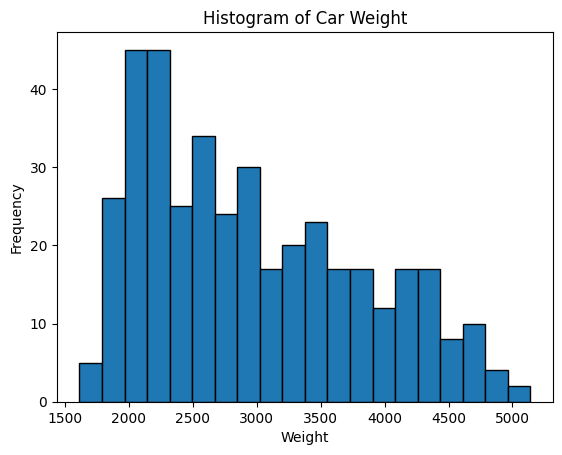

In [9]:
# Vẽ histogram trọng lượng xe
plt.hist(mpg_data['weight'], bins=20, edgecolor='black')

# Đặt tiêu đề và nhãn trục x
plt.title('Histogram of Car Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Hiển thị biểu đồ histogram
plt.show()

## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [10]:
# Tính tỷ lệ các dòng xe dựa trên xuất xứ
origin_counts = mpg_data['origin'].value_counts()
origin_ratios = origin_counts / origin_counts.sum()

# In kết quả
print("Tỷ lệ các dòng xe dựa trên xuất xứ:")
pd.DataFrame(origin_ratios)

Tỷ lệ các dòng xe dựa trên xuất xứ:


,count
origin,
usa,0.625628
japan,0.198492
europe,0.175879


## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

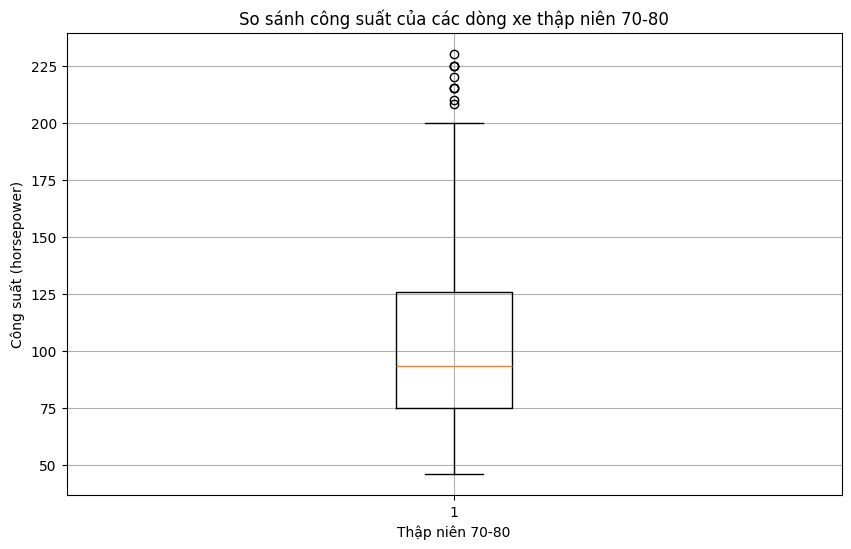

In [11]:
# Lọc dữ liệu các dòng xe thập niên 70-80
df_filtered = mpg_data[(mpg_data['model_year'] >= 70) & (mpg_data['model_year'] <= 82)]

# Kiểm tra xem có dòng dữ liệu nào được lọc ra không
pd.DataFrame(df_filtered, columns=mpg_data.columns)

# Tạo boxplot so sánh công suất
plt.figure(figsize=(10, 6))
plt.boxplot(df_filtered['horsepower'].dropna())  # Loại bỏ giá trị NaN nếu có

# Đặt tiêu đề và nhãn trục x, y
plt.xlabel('Thập niên 70-80')
plt.ylabel('Công suất (horsepower)')
plt.title('So sánh công suất của các dòng xe thập niên 70-80')
plt.grid(True)

# Hiển thị biểu đồ boxplot
plt.show()

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

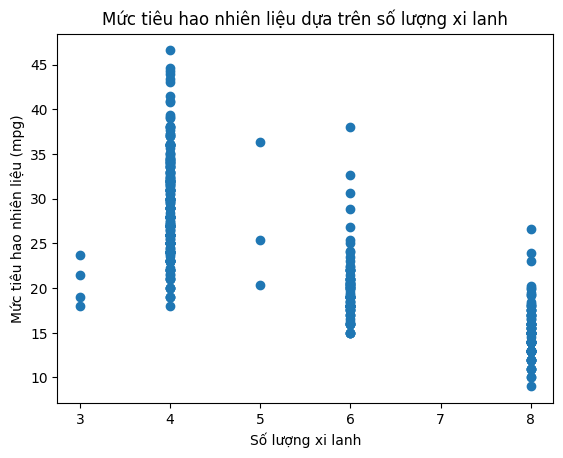

In [12]:
plt.scatter(x=mpg_data['cylinders'], y=mpg_data['mpg'])
plt.xlabel('Số lượng xi lanh')
plt.ylabel('Mức tiêu hao nhiên liệu (mpg)')
plt.title('Mức tiêu hao nhiên liệu dựa trên số lượng xi lanh')
plt.show()

### 7.2 Với công suất theo mã lực

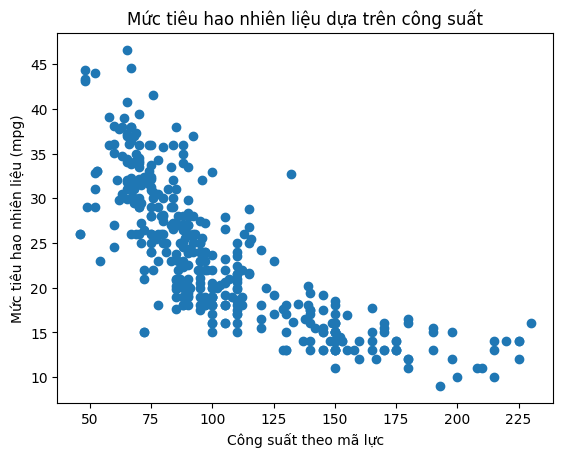

In [13]:
plt.scatter(x=mpg_data['horsepower'], y=mpg_data['mpg'])
plt.xlabel('Công suất theo mã lực')
plt.ylabel('Mức tiêu hao nhiên liệu (mpg)')
plt.title('Mức tiêu hao nhiên liệu dựa trên công suất')
plt.show()

### 7.3 Với gia tốc

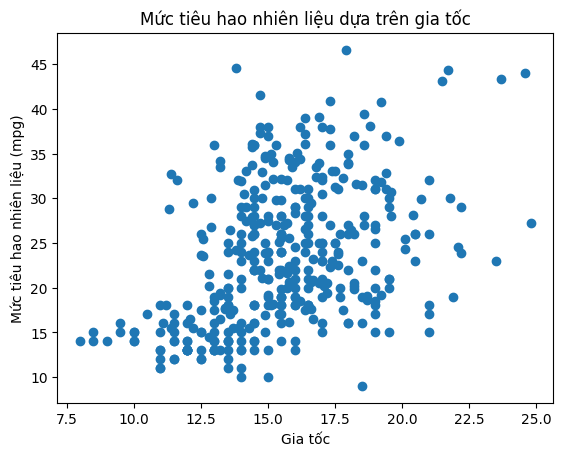

In [14]:
plt.scatter(x=mpg_data['acceleration'], y=mpg_data['mpg'])
plt.xlabel('Gia tốc')
plt.ylabel('Mức tiêu hao nhiên liệu (mpg)')
plt.title('Mức tiêu hao nhiên liệu dựa trên gia tốc')
plt.show()

### 7.4 Với năm sản xuất

In [ ]:
plt.scatter(x=mpg_data['model_year'], y=mpg_data['mpg'])
plt.xlabel('Năm sản xuất')
plt.ylabel('Mức tiêu hao nhiên liệu (mpg)')
plt.title('Mức tiêu hao nhiên liệu dựa trên năm sản xuấts')
plt.show()